In [ ]:
#Importando librerías

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
import imageio
from google.colab import drive
import matplotlib.colors as colors

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Definiendo constantes y variables

Nx = 20                                       # Número de osciladores en x para el lado A y B
Ny = 20                                       # Número de osciladores en y para el lado A y B

qa = 300                                      # Energía inicial disponible en el lado A
qb = 0                                        # Energía inicial disponible en el lado B

q = qa + qb                                   # Energía total del sistema

config = np.zeros((Ny,Nx*2))                  # Matriz 50x100 de la configuración de energía

A = np.random.randint(0, Nx, (qa,2))          # Posiciones (x,y) aleatorias en la parte A del sólido

Bx = np.random.randint(Nx, 2*Nx, (qb,1))      # Posiciones x aleatorias en la parte B del sólido
By = np.random.randint(0, Ny, (qb,1))         # Posiciones y aleatorias en la parte B del sólido

In [ ]:
#Repartición inicial de la energía

#En la parte A

for i in range(len(A)):
    
    posx_A = A[i][0]
    posy_A = A[i][1]
  
    config[posy_A][posx_A] += 1

#En la parte B

for i in range(len(Bx)):
          
    posx_B = Bx[i]
    posy_B = By[i]
    
    config[posy_B][posx_B] += 1

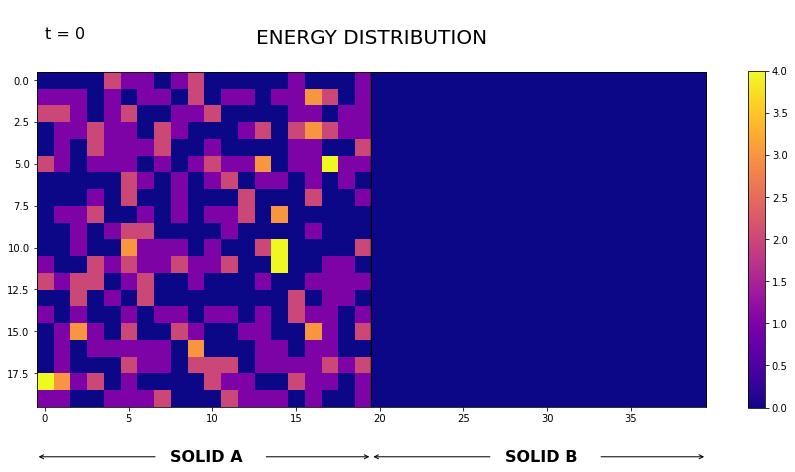

In [ ]:
#Gráfica de la distribución de energía incial

plt.figure(figsize = (15,7))

plt.title('\nENERGY DISTRIBUTION\n', fontsize = '20')

plt.imshow(config, cmap = 'plasma')
plt.colorbar(shrink = 0.885)

plt.text(0, -2.5, 't = 0', size=16)
plt.text(7.5, 22.8, 'SOLID A', size=16, weight= 'bold')
plt.text(27.5, 22.8, 'SOLID B', size=16, weight= 'bold')

plt.annotate('', xy=(0, -0.15), xycoords='axes fraction', xytext=(0.18, -0.15),
            arrowprops=dict(arrowstyle="->", color='k'))

plt.annotate('', xy=(0.34, -0.15), xycoords='axes fraction', xytext=(0.5, -0.15), 
            arrowprops=dict(arrowstyle="<-", color='k'))

plt.annotate('', xy=(0.5, -0.15), xycoords='axes fraction', xytext=(0.68, -0.15), 
            arrowprops=dict(arrowstyle="->", color='k'))

plt.annotate('', xy=(1, -0.15), xycoords='axes fraction', xytext=(0.84, -0.15), 
            arrowprops=dict(arrowstyle="->", color='k'))

plt.arrow(19.5,-0.5, 0, 19.99)

plt.savefig('gdrive/MyDrive/ProyectoComputacional/InitialConfig.png')

plt.show()

In [ ]:
#Evolución del sistema

t = 20000                                 # Número de iteraciones del sistema o tiempo de evolución

#Inicialización del documento donde se van a guardar los datos

f = open("gdrive/MyDrive/ProyectoComputacional/datos.dat","w+")
fp = open("gdrive/MyDrive/ProyectoComputacional/names.dat","w+")

f.write('#time \t qa_evol \t qb_evol\n')
fp.write('#Names\n')

7

In [ ]:
#Evolución

for i in range(t):
    
    if i == 0:
        
        f1 = open("gdrive/MyDrive/ProyectoComputacional/Eo0.dat","w+")
        f1.write('#Eo0\n')
        
        for a in range(Nx*2):
            for b in range(Ny):
            
                f1.write('%f\n'%config[b][a])
                
        f1.close()
    
    if i == 1000:
        
        f2 = open("gdrive/MyDrive/ProyectoComputacional/Eo1000.dat","w+")
        f2.write('#Eo1000\n')
        
        for a in range(Nx*2):
            for b in range(Ny):
                
                f2.write('%f\n'%config[b][a])
                
        f2.close()
                
    
    #Energía disponible en A en el tiempo t
    
    qa_ins = 0
    
    for l in range(Nx):
        for m in range(Ny):
            qa_ins = qa_ins + config[m][l]

    #Escribiendo datos en un archivo

    f.write('%f \t %f \t %f\n'%(i, qa_ins, q-qa_ins))
    
    for x in range(201):

      if i == x*100:
        
        #Representación de la evolución de la energía de cada oscilador en el tiempo
    
        name = 'ED_%d.png' %i
        
        fp.write('%s\n'%(name))       
        
        plt.figure(figsize = (15,7))
        
        plt.title('\nENERGY DISTRIBUTION\n', fontsize = '20')

        plt.imshow(config, cmap = 'plasma')
        
        plt.colorbar(shrink = 0.885)

        plt.text(0, -2.5, 't = %d'%i, size=16)
        plt.text(7.5, 22.8, 'SOLID A', size=16, weight= 'bold')
        plt.text(27.5, 22.8, 'SOLID B', size=16, weight= 'bold')

        plt.annotate('', xy=(0, -0.15), xycoords='axes fraction', xytext=(0.18, -0.15),
                    arrowprops=dict(arrowstyle="->", color='k'))

        plt.annotate('', xy=(0.34, -0.15), xycoords='axes fraction', xytext=(0.5, -0.15), 
                    arrowprops=dict(arrowstyle="<-", color='k'))

        plt.annotate('', xy=(0.5, -0.15), xycoords='axes fraction', xytext=(0.68, -0.15), 
                    arrowprops=dict(arrowstyle="->", color='k'))

        plt.annotate('', xy=(1, -0.15), xycoords='axes fraction', xytext=(0.84, -0.15), 
                    arrowprops=dict(arrowstyle="->", color='k'))

        plt.arrow(19.5,-0.5, 0, 19.99)

        plt.savefig('gdrive/MyDrive/ProyectoComputacional/CMap/'+name)
        plt.close()
    
    #Traspaso de energía
    
    #Posiciónes (x,y) del oscilador que va a ceder su energía si esta es > 0
    
    posx = np.random.randint(0,Nx*2)
    posy = np.random.randint(0,Ny)
        
    if config[posy][posx] > 0:
        
        #Posiciónes (x,y) del oscilador que va a recibir la energía
        
        posx_new = np.random.randint(0,Nx*2)
        posy_new = np.random.randint(0,Ny)
        
        config[posy][posx] -= 1
        config[posy_new][posx_new] += 1
        
f.close()
fp.close()

In [ ]:
#Escribiendo los datos del último estado del sistema

f3 = open("gdrive/MyDrive/ProyectoComputacional/EoLast.dat","w+")
f3.write('#EoLast\n')
        
for a in range(Nx*2):
    for b in range(Ny):
        
        f3.write('%f\n'%config[b][a])
                
f3.close()

In [ ]:
#Extracción de los datos generados en los archivos '.dat'

datos = np.loadtxt('gdrive/MyDrive/ProyectoComputacional/datos.dat')
names = np.loadtxt('gdrive/MyDrive/ProyectoComputacional/names.dat', dtype='str')

time = []                                             # Lista de tiempos en la evolución del sistema
qa_evol = []                                          # Valores de la energía total del sistema A en cada tiempo
qb_evol = []                                          # Valores de la energía total del sistema B en cada tiempo

for i in range(len(datos)):

    time.append(datos[i][0])

    qa_evol.append(datos[i][1])

    qb_evol.append(datos[i][2])
    
#Lista de energías asociadas a cada oscilador del sistema en t=0, t=1000, t=20000

Eo0= np.loadtxt('gdrive/MyDrive/ProyectoComputacional/Eo0.dat')
Eo1000 = np.loadtxt('gdrive/MyDrive/ProyectoComputacional/Eo1000.dat')
EoLast = np.loadtxt('gdrive/MyDrive/ProyectoComputacional/EoLast.dat')

In [ ]:
# Realizando Gif

with imageio.get_writer('gdrive/MyDrive/ProyectoComputacional/Animation.gif', mode='I') as writer:
    for fname in names:
        image = imageio.imread('gdrive/MyDrive/ProyectoComputacional/CMap/'+fname)
        writer.append_data(image)

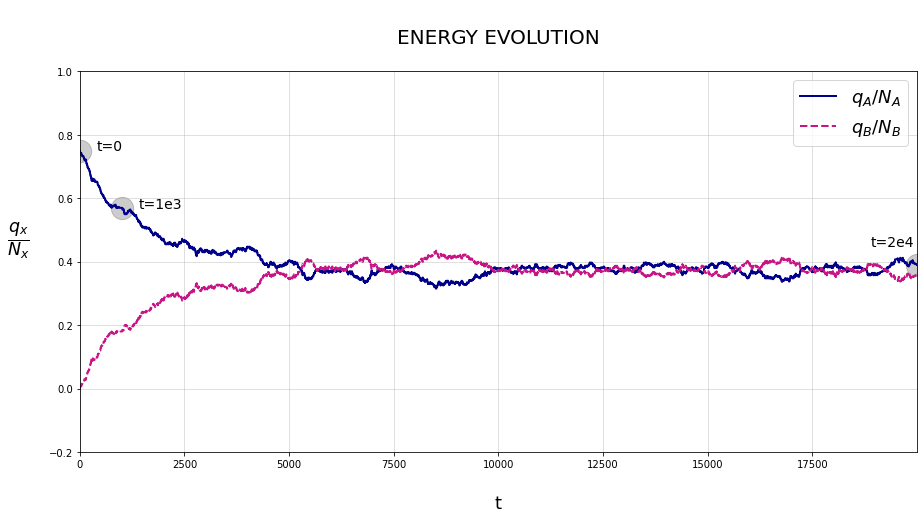

In [ ]:
#Gráfica de la evolución de la energía en el lado A y B como función del tiempo


qa_evol = np.array(qa_evol)
qb_evol = np.array(qb_evol)

qa_evolp = qa_evol/(Nx*Ny)
qb_evolp = qb_evol/(Nx*Ny)



plt.figure(figsize = (15,7))

plt.title('\nENERGY EVOLUTION\n', fontsize = '20')

plt.plot(time, qa_evolp, color = 'darkblue', linewidth = 2, label = r'$q_{A}/N_{A}$')
plt.plot(time, qb_evolp, '--', color = 'mediumvioletred', linewidth = 2, label = r'$q_{B}/N_{B}$')

plt.scatter(0, qa_evolp[0], s=500, alpha=0.2, c = 'k')
plt.text(400, qa_evolp[0], 't=0', size = 14)

plt.scatter(1000, qa_evolp[1000], s=500, alpha=0.2, c = 'k')
plt.text(1400, qa_evolp[1000], 't=1e3', size = 14)

plt.scatter(19999, qa_evolp[19999], s=500, alpha=0.2, c = 'k')
plt.text(18900, 0.45, 't=2e4', size = 14)

plt.xlabel('\nt', fontsize = '18')
plt.ylabel(r'$\frac{q_{x}}{N_{x}}$', fontsize = '25', rotation = 0, labelpad=30)

plt.xlim(min(time), max(time))
plt.ylim(-0.2,1)

plt.legend(fontsize = '18')

plt.grid(alpha = 0.5)

plt.savefig('gdrive/MyDrive/ProyectoComputacional/EEvol.png')

plt.show()    

In [ ]:
#Gráfica de barras de la evolución para tres puntos

pos_1 = np.linspace(1,400,400)
pos_2 = np.linspace(401,800,400)

Eo0_1 = [] 
Eo0_2 = []

Eo1000_1 = [] 
Eo1000_2 = []

EoLast_1 = [] 
EoLast_2 = []                             

for i in range(len(Eo0)):
    
    if i < 400:
        Eo0_1.append(Eo0[i])
        Eo1000_1.append(Eo1000[i])
        EoLast_1.append(EoLast[i])
    
    if i >= 400:
        Eo0_2.append(Eo0[i])
        Eo1000_2.append(Eo1000[i])
        EoLast_2.append(EoLast[i])


line = np.ones(50)*400
y = np.linspace(0,6,50)

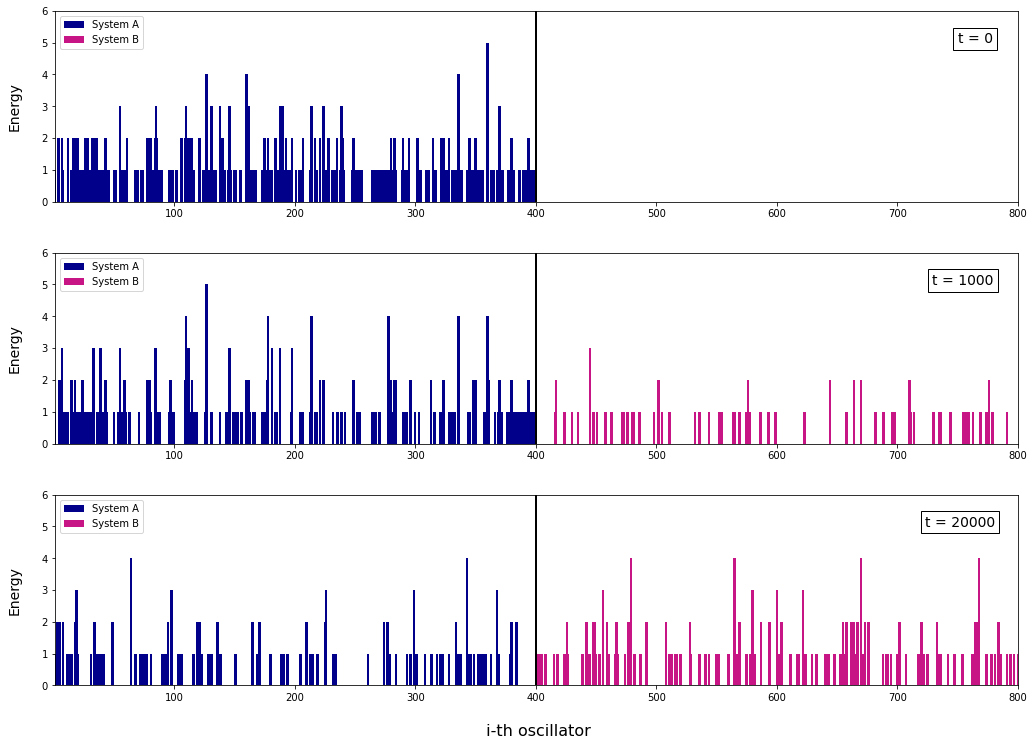

In [ ]:
plt.figure(figsize= (15,11))

#plt.suptitle('\n OSCILLATOR ENERGY\n', fontsize = 20)

plt.subplot(3,1,1)
plt.bar(pos_1, Eo0_1, color = 'darkblue', width = 2, label = 'System A')
plt.bar(pos_2, Eo0_2, color = 'mediumvioletred', width = 2, label = 'System B')
plt.plot(line, y, 'k-', linewidth = 2)

plt.text(750, 5, 't = 0', size=14, bbox={'facecolor': 'white'})

plt.legend(loc = 2)

plt.xlim(min(pos_1), max(pos_2))
plt.ylim(0,6)

plt.ylabel('Energy\n', fontsize = 14)

#-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

plt.subplot(3,1,2)
plt.bar(pos_1, Eo1000_1, color = 'darkblue', width = 2, label = 'System A')
plt.bar(pos_2, Eo1000_2, color = 'mediumvioletred', width = 2, label = 'System B')
plt.plot(line, y, 'k-', linewidth = 2)

plt.text(729, 5, 't = 1000', size=14, bbox={'facecolor': 'white'})

plt.legend(loc = 2)

plt.xlim(min(pos_1), max(pos_2))
plt.ylim(0,6)

plt.ylabel('Energy\n', fontsize = 14)

#-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

plt.subplot(3,1,3)
plt.bar(pos_1, EoLast_1, color = 'darkblue', width = 2, label = 'System A')
plt.bar(pos_2, EoLast_2, color = 'mediumvioletred', width = 2, label = 'System B')
plt.plot(line, y, 'k-', linewidth = 2)

plt.text(723, 5, 't = 20000', size=14, bbox={'facecolor': 'white'})

plt.legend(loc = 2)

plt.xlim(min(pos_1), max(pos_2))
plt.ylim(0,6)

plt.xlabel('\n i-th oscillator', fontsize = 16)
plt.ylabel('Energy\n', fontsize = 14)

plt.tight_layout(pad=3.0)

plt.savefig('gdrive/MyDrive/ProyectoComputacional/Bars.png')

plt.show()